<a href="https://colab.research.google.com/github/datajcthemax/playdata/blob/main/day26_transferlearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 26번째 이야기 - 전이학습 transfer-learning
- 전이학습에 대하여
- 전이학습 개념과 fine tuning
- 실제 데이터에 적용
** local에서 데이터셋 구성
** colab에서 transfer learning 적용
- mini project 팀 구성

In [ ]:
import torch
from torch import nn
from torchvision import datasets
from torch.utils.data import DataLoader
device = 'cuda' if torch.cuda.is_available() else 'cpu'

- https://pytorch.org/vision/main/models.html 이미지 전이학습
- https://pytorch.org/hub/ 여러 전이학습 모델

In [ ]:
# 데이터 준비
# 데이터 전처리
# train/test data
# dataloader
# model
# loss function
# optimizer
# hyper parameter
# training + test
# visualization

In [ ]:
# 데이터 준비
train_dataset = datasets.MNIST(root='./data', train=True, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 261127721.11it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 75662519.57it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 186251518.81it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 12616244.22it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
train_data = [(x.unsqueeze(0)/255, y) for x, y in zip(train_dataset.data, train_dataset.targets)]
test_data = [(x.unsqueeze(0)/255, y) for x, y in zip(test_dataset.data, test_dataset.targets)]

In [ ]:
# hyper parameter
BATCH_SIZE = 128
EPOCHS = 100
LEARNING_RATE = 1e-3

In [ ]:
train_loader = DataLoader(train_data, batch_size = BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_data, batch_size = BATCH_SIZE, shuffle=True)

In [ ]:
torch.__version__

'2.0.0+cu118'

In [ ]:
from torchvision import models

# pre trained model
model = models.resnet18()

In [ ]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
# nn.Linear(10, 1)
# 새로운 분류기 설정
# 0~9까지 10개의 클래스 구분하는 분류기로 만든다
model.fc

Linear(in_features=512, out_features=1000, bias=True)

In [ ]:
model.fc = nn.Linear(in_features=512, out_features=10)

In [ ]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
model.conv1

Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

In [ ]:
model.conv1=nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

In [ ]:
model.to(device)

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
from torch import optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

- 최적 모델을 저장 하고 관리하는 방법에 대해 고민
- 도배 데이터셋을 로컬에 작업 폴더에 세팅
- 경로에 한글이 있는 경우 이미지 어떻게 읽어올 것인지 고민
** 슬랙에 공유해주세요~
- 도배 내용에는 클래스 몇개로 해야 될까 : 19

99번째 train_loss : 0.0 test_loss : 0.04 Accuracy : 99.34%


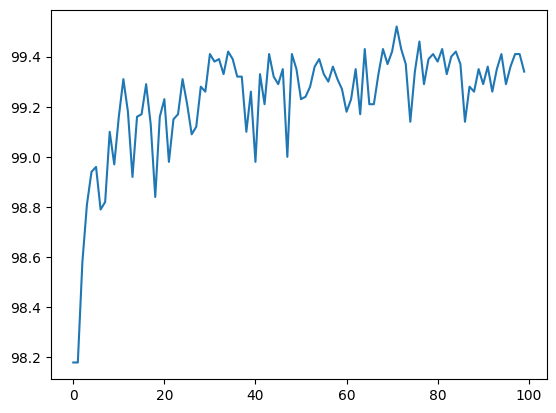

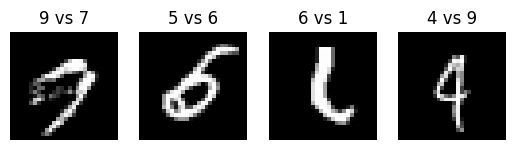

In [ ]:
import numpy as np
from tqdm.auto import tqdm # 진행상황 나타내는 프로그레스 바 표시
from IPython.display import clear_output # 화면 지우는 함수
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
total_acc = []
for epoch in range(EPOCHS):
  # 학습
  train_loss=[] # 학습시 나타나는 로스를 종합 -> 이후에 그래프 표시를 위함
  for img, label in train_loader:
    optimizer.zero_grad()
    pred = model(img.to(device))
    loss = criterion(pred, label.to(device))
    loss.backward()
    optimizer.step()
    train_loss.append(loss.item())
  # 평가
  test_loss=[]
  test_sources = []
  with torch.no_grad():
    for img, label in test_loader:
      pred = model(img.to(device))
      loss = criterion(pred, label.to(device))
      # pred = model(img)
      # loss = criterion(pred, label)
      test_loss.append(loss.item())
      test_sources.append((img[pred.cpu().argmax(axis=1)!=label.cpu()],
                           label[pred.cpu().argmax(axis=1)!=label.cpu()],pred.cpu().argmax(axis=1)[pred.cpu().argmax(axis=1)!=label.cpu()])) # label과 pred 값이 다른 부분만 test_sources에 담기
  # 노트북 파일 기존 프린트 되었던 화면을 지우는 코드
  clear_output()

  # 인식 잘 안된 부분의 시각화를 위해서 img, label, pred를 모아서 정리
  imgs = [x[0] for x in test_sources]
  imgs = torch.cat(imgs, axis=0)
  labels = [x[1] for x in test_sources]
  labels = torch.cat(labels, axis=0)
  preds = [x[2] for x in test_sources]
  preds = torch.cat(preds, axis=0)

  # 정확도 계산을 위한 코드. 다양하게 다른 방법도 가능함
  # sklearn의 metric 이용하는 방법 추천
  wrongs = [len(x[0]) for x in test_sources]
  acc = round(100-(sum(wrongs)/100),2)

  # 정확도 추이를 보기 위하여 각 에폭에서의 정확도 정보 수집
  total_acc.append(acc)

  # 학습 진행 상황 출력
  print("{}번째 train_loss : {} test_loss : {} Accuracy : {}%".format(epoch, round(np.array(train_loss).mean(),2),round(np.array(test_loss).mean(),2),
                                                                   acc))
  if img.shape[0]<1:continue # 혹시 더이상 오분류 내용이 없으면 지나가도록 세팅

  # 정확도 그래프 그리기
  plt.plot(total_acc)
  plt.show()

  # 오분류 내용이 어떤건지 알기 위해 오분류 내용 4개 뽑아서 label과 pred 글자 넣어서 표시
  for i in range(4):
    plt.subplot(1,4,i+1)    
    plt.imshow(imgs[i][0], cmap='gray')    
    plt.title("{} vs {}".format(labels[i].item(),preds[i].item()))
    plt.axis('off')
  plt.show()